# Example Notebook demonstarting some basic functionality

### Working with legacy StatSTEMInput data

In [1]:
import qem
import matplotlib.pyplot as plt
import numpy as np

legacyStatSTEM = qem.io.read_legacyInputStatSTEM('../data/Au/Example_Au.mat')
image = legacyStatSTEM['input']['obs']
dx = legacyStatSTEM['input']['dx']
inputStatSTEM = legacyStatSTEM['input']
outputStatSTEM = legacyStatSTEM['output']

input_coordinates = inputStatSTEM['coordinates']
output_coordinates = outputStatSTEM['coordinates']
input_coordinates[:,1] = input_coordinates[:,1]/dx
input_coordinates[:,0] = input_coordinates[:,0]/dx
from qem.image_fitting import ImageModelFitting
model=ImageModelFitting(image, dx=dx)
model.import_coordinates(input_coordinates)
model.plot()

FileNotFoundError: ../data/Au/Example_Au.mat not found

In [9]:
from qem.image_fitting import ImageModelFitting
model=ImageModelFitting(image, dx=dx)
model.import_coordinates(input_coordinates)
model.fit_background = True
model.model = 'gaussian'
params = model.init_params()
params = model.linear_estimator(params)
model.prediction = model.predict_local(params)
# model.fit_global(params, maxiter=10000, tol =1e-3)
model.fit_random_batch(params, maxiter=100, tol =1e-3)


Fitting random batch:  67%|██████▋   | 4/6 [00:21<00:10,  5.39s/it]

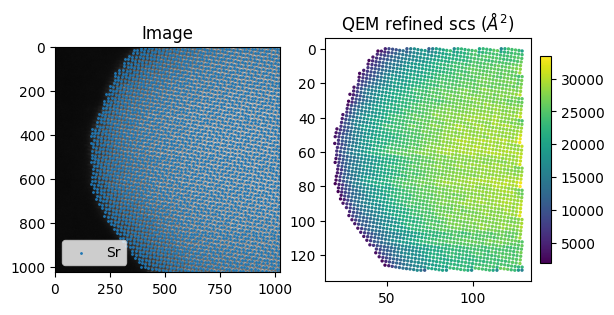

In [6]:
model.plot_scs()

/tmp/ipykernel_399746/2254875619.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_399746/2254875619.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_399746/2254875619.py:27: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_399746/2254875619.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/tmp/ipykernel_399746/2254875619.py:41: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


Text(0.5, 1.0, 'Residuals')

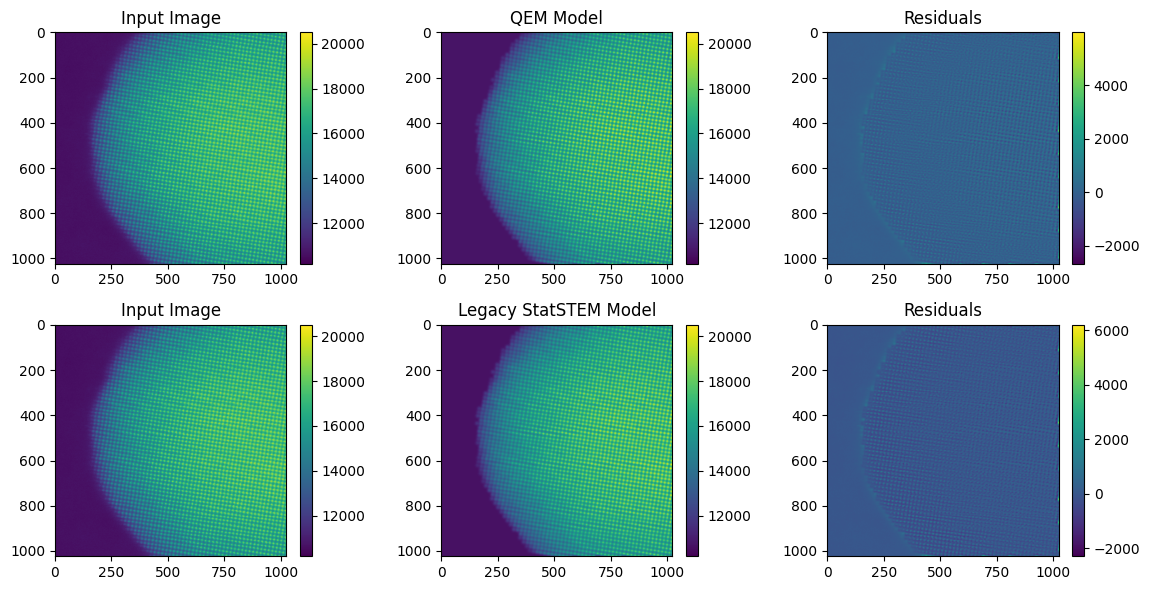

In [5]:
plt.figure(figsize=(12,6))

plt.subplot(2,3,1)
im=plt.imshow(model.image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Input Image')

plt.subplot(2,3,2)
im=plt.imshow(model.model)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(model.image.min(),model.image.max())
plt.tight_layout()
plt.title('QEM Model')

plt.subplot(2,3,3)
diff = model.image - model.model
im=plt.imshow(diff)
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim([-1000,1000])
plt.tight_layout()
plt.title('Residuals')

plt.subplot(2,3,4)
im=plt.imshow(image)
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.tight_layout()
plt.title('Input Image')

plt.subplot(2,3,5)
im=plt.imshow(outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
plt.clim(model.image.min(),model.image.max())   
plt.tight_layout()
plt.title('Legacy StatSTEM Model')

plt.subplot(2,3,6)
im=plt.imshow(inputStatSTEM['obs']-outputStatSTEM['model'])
plt.colorbar(im,fraction=0.046, pad=0.04)
# plt.clim([-1000,1000])
plt.tight_layout()
plt.title('Residuals')